# Rain in Australia

In [24]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('Kaggle/weatherAUS.csv')
data.head(10)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


# Contando linhas e colunas

In [25]:
'Linhas: {} | Colunas: {}'.format(data.shape[0], data.shape[1])

'Linhas: 142193 | Colunas: 24'

# Verificando dados nulos no atributo alvo

In [26]:
rain_tomorrow = list(data.RainTomorrow)

for i in rain_tomorrow:
    if (i=='Yes' or i=='No'):
        continue
    else:
        print('Oops...')


In [27]:
evaporation = list(data.Evaporation)
print(evaporation)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

In [28]:
sunshine = list(data.Sunshine)
print(sunshine)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

# Exibindo e contando o dataset após a remoção de valores nulos

In [29]:
data = data.dropna()
data.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
5939,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,0.0,No
5940,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,0.0,No
5942,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,0.0,No
5943,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,0.0,No
5944,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,0.0,No
5945,2009-01-07,Cobar,27.1,36.1,0.0,13.0,0.0,N,43.0,N,...,19.0,1007.7,1007.4,8.0,8.0,30.7,34.3,No,0.0,No
5946,2009-01-08,Cobar,23.3,34.0,0.0,9.8,12.6,SSW,41.0,S,...,15.0,1011.3,1009.9,3.0,1.0,25.0,31.5,No,0.0,No
5947,2009-01-09,Cobar,16.1,34.2,0.0,14.6,13.2,SE,37.0,SE,...,9.0,1013.3,1009.2,1.0,1.0,20.7,32.8,No,0.0,No
5948,2009-01-10,Cobar,19.0,35.5,0.0,12.0,12.3,ENE,48.0,ENE,...,28.0,1008.3,1004.0,1.0,5.0,23.4,33.3,No,0.0,No
5949,2009-01-11,Cobar,19.7,35.5,0.0,11.0,12.7,NE,41.0,NNE,...,14.0,1007.9,1005.8,1.0,5.0,24.0,33.6,No,0.0,No


In [30]:
'Linhas: {} | Colunas: {}'.format(data.shape[0], data.shape[1])

'Linhas: 56420 | Colunas: 24'

# Lidando com variáveis categóricas

In [31]:
print('Rain tomorrow:')
data.RainTomorrow.unique()

print('Rain today:')
data.RainToday.unique()


Rain tomorrow:
Rain today:


array(['No', 'Yes'], dtype=object)

In [32]:
print('Wind gust direction:')
data.WindGustDir.unique()

print('Wind direction at 9 a. m.:')
data.WindDir9am.unique()

Wind gust direction:
Wind direction at 9 a. m.:


array(['ENE', 'SSE', 'NNE', 'WNW', 'NW', 'N', 'S', 'SE', 'NE', 'W', 'SSW',
       'E', 'NNW', 'ESE', 'WSW', 'SW'], dtype=object)

In [33]:
label_encoder = LabelEncoder()

data.RainTomorrow = label_encoder.fit_transform(data.RainTomorrow)
data.RainToday = label_encoder.fit_transform(data.RainToday)
data.WindGustDir = label_encoder.fit_transform(data.WindGustDir)
data.WindDir9am = label_encoder.fit_transform(data.WindDir9am)

data.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
5939,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,11,48.0,1,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0.0,0
5940,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,8,37.0,10,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0.0,0
5942,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,5,46.0,5,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0.0,0
5943,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,14,31.0,14,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0.0,0
5944,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,14,35.0,7,...,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0.0,0
5945,2009-01-07,Cobar,27.1,36.1,0.0,13.0,0.0,3,43.0,3,...,19.0,1007.7,1007.4,8.0,8.0,30.7,34.3,0,0.0,0
5946,2009-01-08,Cobar,23.3,34.0,0.0,9.8,12.6,11,41.0,8,...,15.0,1011.3,1009.9,3.0,1.0,25.0,31.5,0,0.0,0
5947,2009-01-09,Cobar,16.1,34.2,0.0,14.6,13.2,9,37.0,9,...,9.0,1013.3,1009.2,1.0,1.0,20.7,32.8,0,0.0,0
5948,2009-01-10,Cobar,19.0,35.5,0.0,12.0,12.3,1,48.0,1,...,28.0,1008.3,1004.0,1.0,5.0,23.4,33.3,0,0.0,0
5949,2009-01-11,Cobar,19.7,35.5,0.0,11.0,12.7,4,41.0,5,...,14.0,1007.9,1005.8,1.0,5.0,24.0,33.6,0,0.0,0


In [34]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int64
WindGustSpeed    float64
WindDir9am         int64
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RISK_MM          float64
RainTomorrow       int64
dtype: object

# Verificando correlação entre os atributos

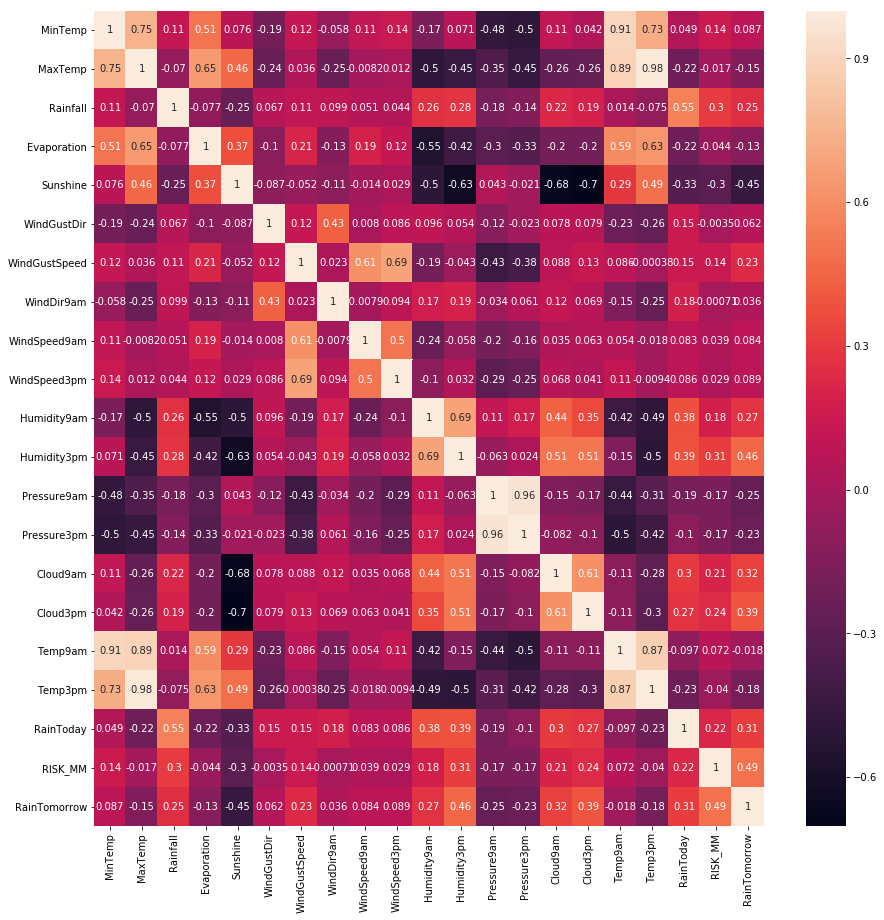

In [35]:
fig, tam = plt.subplots(figsize=(15,15))
correlation = data.corr()
sns.heatmap(
    correlation,
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values,
    ax=tam, annot=True
)

# kNN

In [36]:
X = data[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed', 'RainToday']]
Y = data[['RainTomorrow']]

X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y.values, test_size=.2)

knn = KNeighborsRegressor(n_neighbors=5)

knn.fit(X_train, Y_train)

predictions = knn.predict(X_test)

error = 0
for case, prediction in zip(Y_test, predictions):
    #print(case, prediction)
    error += abs(case - prediction)

print('Erro Absoluto Médio:',(error / len(predictions)))

Erro Absoluto Médio: [0.26006735]


# Decision Tree

In [37]:
X = data.loc[:, ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed', 'RainToday']]
Y = data.loc[:, ['RainTomorrow']]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 100)

In [38]:
clf_entropy = DecisionTreeClassifier(
    criterion = "entropy",
    random_state = 100,
    max_depth=5,
    min_samples_leaf=3
)

clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [39]:
y_pred = clf_entropy.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
print ("Accuracy: ", accuracy_score(y_test,y_pred)*100)

Accuracy:  79.23608649415101


# Neural Network

In [45]:
X = data.loc[:, ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed', 'RainToday']]
Y = data.loc[:, ['RainTomorrow']]

X_train, X_test, y_train, y_test = train_test_split( X.values, Y.values, test_size = 0.2, random_state = 100)

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [46]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(3,3,3),max_iter=400)
mlp_clf.fit(X, Y)

/home/lucas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3, 3, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=400, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [52]:
predictions = mlp_clf.predict(X_test)

In [53]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84      8874
           1       0.21      0.10      0.14      2410

   micro avg       0.73      0.73      0.73     11284
   macro avg       0.50      0.50      0.49     11284
weighted avg       0.66      0.73      0.69     11284

